# 1.[Problem statement and our objectives](#1)
# 2.[Data loading](#2)
# 3.[Data Augmentation](#3)
# 4.[Classes Distribution](#4)
# 5.[Simple Neural Network Architecture](#5)
# 6.[Adding Batch Normalization Layer](#6)
# 7.[Simple convolutional Neural Network(CCN)](#7)
# 8.[Simple convolutionnl  Neural Testing and Evaluating](#8)

<a id=1></a>
**Welcome to our exciting computer vision project!**

 In this endeavor, our primary objective is to develop and evaluate various neural network models for the classification of plant leaves based on their health status. We have  a robust dataset comprising more than 1500 images of plant leaves, each belonging to one of three distinct classes: **"Rust," "Powdery," or "Healthy."**

**Challenge:**

The core challenge at hand is to construct an expert system capable of accurately categorizing any given plant leaf image into one of these three classes. To accomplish this, we will train, assess, and compare various neural network architectures. Our mission is to create a highly effective and interpretable system that can enhance our understanding of plant health and contribute to more informed agricultural decisions.


Throughout the project, we will explore the performance, strengths, and weaknesses of different neural network models to ensure that we achieve the most reliable and efficient classification results. The ultimate goal is to empower our system to make rapid, accurate, and actionable classifications of plant leaves, which can aid in early detection and management of plant diseases.


By combining the power of machine learning with our comprehensive dataset, we aim to develop a solution that not only meets the classification needs but also provides valuable insights into the health of plants, contributing to the advancement of agriculture and crop management.


Zulqar Nain

Date: 27-oct-2023 Fri

now we will start our journey by importing necessray dependencies and libraries after it we will loading the data.

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id=2></a>
# **2.Data Loading through keras:**

In [ ]:
# path of our dataset
data_path='/content/drive/My Drive/kaggle/plant_disease_dataset/'
train="Train/"
test="Test/"
valid="Validation/"

<a id=3></a>
# **3. Data Augmentation**:

Data augmentation in deep learning is a technique used to increase the diversity and quantity of training data by applying various transformations to the existing dataset. These transformations can include modifications such as rotations, flips, translations, scaling, cropping, brightness adjustments, and more. Data augmentation is primarily employed in the field of computer vision but can also be used in other domains like natural language processing or speech recognition.

Here are the key reasons why data augmentation is necessary and beneficial in deep learning:

1. **Increased Training Data:** Deep learning models, especially deep neural networks, require a large amount of training data to generalize well and avoid overfitting. In many cases, collecting a vast amount of real-world data is challenging and expensive. Data augmentation allows you to generate additional training examples from your existing data, effectively increasing the size of your dataset.

2. **Improved Generalization:** By exposing the model to a wider range of data variations, data augmentation helps the model become more robust and better at generalizing to unseen examples. It reduces the risk of the model learning to memorize the training data (overfitting) and instead encourages it to capture more abstract and invariant features.

3. **Regularization:** Data augmentation acts as a form of regularization by adding noise and variability to the training data. This regularization can help prevent the model from fitting the training data too closely and, as a result, make it more resistant to small fluctuations or errors in the data.

4. **Better Handling of Real-World Variability:** In real-world applications, data often comes in various forms with different lighting conditions, orientations, backgrounds, and other variations. Data augmentation helps the model adapt to these real-world scenarios, making it more reliable and applicable to a wider range of situations.

5. **Balancing Imbalanced Datasets:** In cases where the dataset is imbalanced (i.e., one class has significantly fewer samples than others), data augmentation can be used to create synthetic examples for the minority class, balancing the dataset and improving the model's performance on all classes.

6. **Reduced Dependency on Annotated Data:** In scenarios where collecting labeled data is expensive or time-consuming, data augmentation can help maximize the utility of the existing labeled data by generating more samples for training. This is especially valuable in situations like medical image analysis, where expert annotations are scarce.

In summary, data augmentation is a crucial technique in deep learning that enhances the quality and quantity of training data, leading to improved model performance, robustness, and generalization. It helps address challenges related to data availability and ensures that deep learning models are well-equipped to handle the complexities and variabilities of real-world data.

In [ ]:
# performing data augmentation through keras


#training data augmentation
train_generator=ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1.0/255.0,
)

#test_data
test_generator=ImageDataGenerator(
    rescale=1.0/255.0
)


#validation data
valid_generator=ImageDataGenerator(
rescale=1.0/255.0
)


In [ ]:
from traitlets.traitlets import validate
# image size
image_size=(256,256)

#Train data
train_data=train_generator.flow_from_directory(
  directory=data_path+train,
  target_size=image_size,
  batch_size=32,
  color_mode='rgb',
  class_mode='categorical',
  shuffle=True,
  seed=42
)

#Test data
test_data=test_generator.flow_from_directory(
  directory=data_path+test,
  target_size=image_size,
  batch_size=32,
  color_mode='rgb',
  class_mode='categorical',
  shuffle=True,
  seed=42
)





Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [ ]:
#validation data
valid_data=valid_generator.flow_from_directory(
  directory=data_path+valid,
  target_size=image_size,
  batch_size=32,
  color_mode='rgb',
  class_mode='categorical',
  shuffle=False,
  seed=42
)


Found 60 images belonging to 3 classes.


<a id=4></a>
# 4. Classes Distribution  

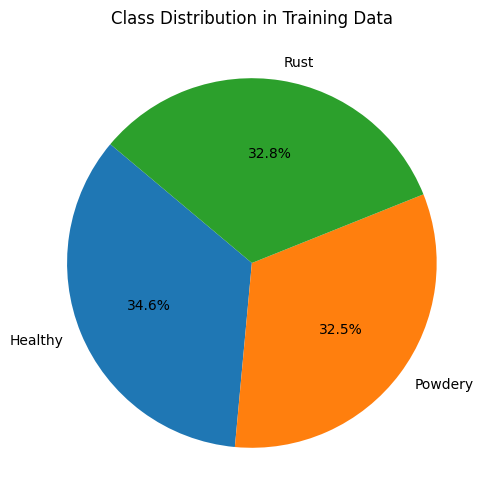

In [ ]:
class_distribution = train_data.classes
class_count = {}
for class_index in class_distribution:
    class_name = train_data.class_indices
    class_name = {v: k for k, v in class_name.items()}
    class_name = class_name[class_index]
    class_count[class_name] = class_count.get(class_name, 0) + 1




# Extract class names and counts
class_names = list(class_count.keys())
class_counts = list(class_count.values())

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140)
plt.title("Class Distribution in Training Data")
plt.show()


So our data is very beautiful mean not imbalance accorrding to data distribution.

# **Some samples from our dataset **

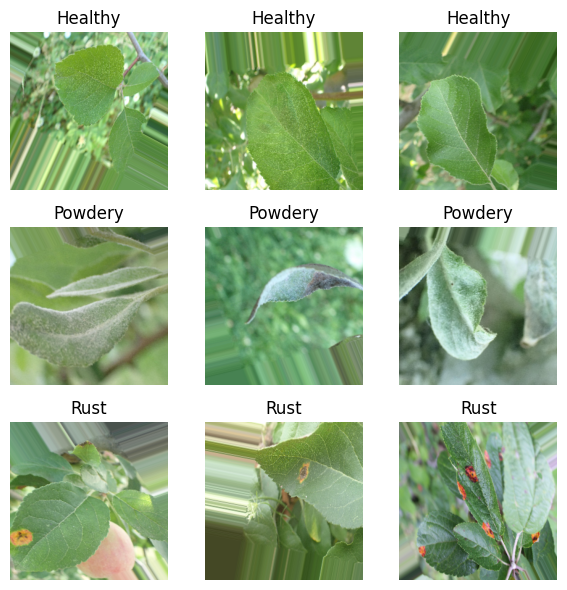

In [ ]:
num_images_per_class = 3 # Adjust this value based on how many images you want to display from each class
# Get the class labels
class_labels = list(train_data.class_indices.keys())

# Create a new figure
plt.figure(figsize=(6, 6))

for i, class_label in enumerate(class_labels):
    # Get a batch of data from the generator
    x, y = train_data.next()

    # Get the indices of samples in the current class
    class_indices = np.where(y[:, class_labels.index(class_label)])[0]

    # Randomly select a few images from this class
    selected_indices = np.random.choice(class_indices, num_images_per_class, replace=False)

    for j, index in enumerate(selected_indices):
        plt.subplot(len(class_labels), num_images_per_class, i * num_images_per_class + j + 1)
        plt.imshow(x[index].astype('uint8'))
        plt.title(class_label)
        plt.axis('off')

plt.tight_layout()
plt.show()


Now this is the time to start our next important stages of our project,

so i mean building  the models or contructing the models archictectures.


<a id=5></a>
# **5.Simple Neural Network Architecture**

In [ ]:
from keras.src import activations
from keras.api._v2 import keras
from tensorflow.keras import metrics
# keras sequential api
model=keras.Sequential()

model.add(layers.Flatten(input_shape=(256, 256, 3)))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

# Defining additional metrics
additional_metrics = [
    metrics.Precision(),
    metrics.Recall()
]


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'] + additional_metrics
)

# Summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 256)               50331904  
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 3)                 99        
                                                                 
Total params: 50416323 (192.32 MB)
Trainable params: 504

In [ ]:
# Train the model
epochs = 30  # Adjust as needed
steps_per_epoch = len(train_data)
validation_steps = len(test_data)
history=model.fit(
    train_data,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_data,
    validation_steps=validation_steps,
    epochs=epochs
)


Epoch 1/30
42/42 [==============================] - 859s 20s/step - loss: 12.8374 - accuracy: 0.3631 - precision: 0.3631 - recall: 0.3631 - val_loss: 10.9799 - val_accuracy: 0.3333 - val_precision: 0.3333 - val_recall: 0.3333
Epoch 2/30
42/42 [==============================] - 110s 3s/step - loss: 6.3186 - accuracy: 0.3782 - precision: 0.3779 - recall: 0.3744 - val_loss: 4.2602 - val_accuracy: 0.4867 - val_precision: 0.4867 - val_recall: 0.4867
Epoch 3/30
42/42 [==============================] - 110s 3s/step - loss: 2.6924 - accuracy: 0.4531 - precision: 0.4558 - recall: 0.4448 - val_loss: 1.4794 - val_accuracy: 0.5333 - val_precision: 0.5302 - val_recall: 0.5267
Epoch 4/30
42/42 [==============================] - 111s 3s/step - loss: 1.2490 - accuracy: 0.5605 - precision: 0.5723 - recall: 0.5386 - val_loss: 1.0694 - val_accuracy: 0.5533 - val_precision: 0.5588 - val_recall: 0.5067
Epoch 5/30
42/42 [==============================] - 115s 3s/step - loss: 1.1671 - accuracy: 0.5567 - prec

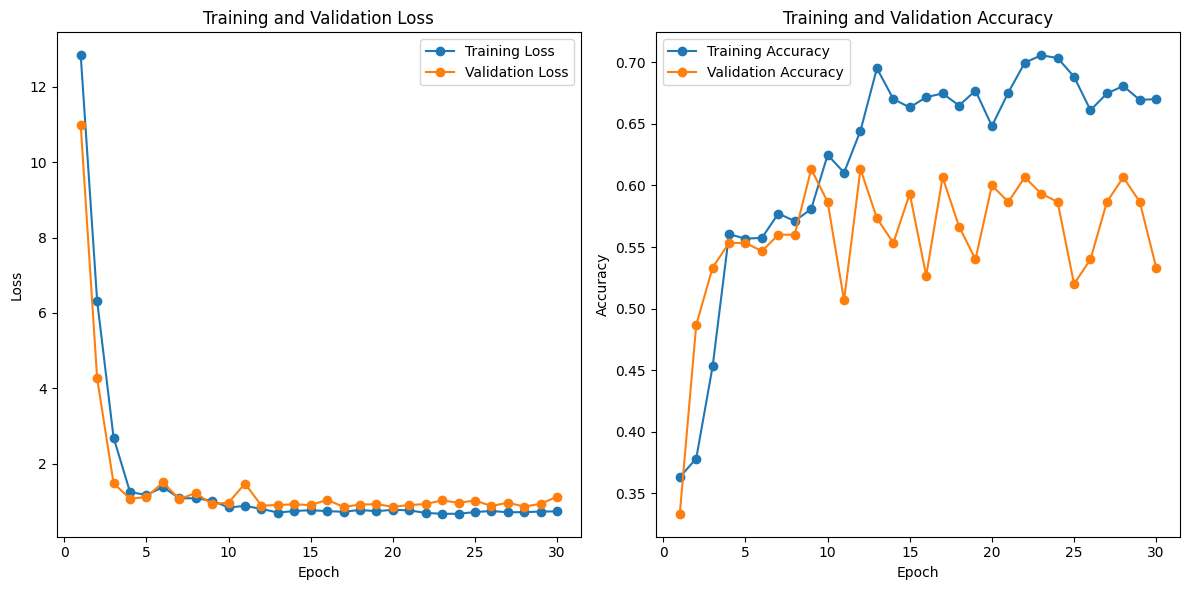

In [ ]:
import matplotlib.pyplot as plt

# Extract training and validation loss and accuracy from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot loss per epoch
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), training_loss, label='Training Loss', marker='o')
plt.plot(range(1, epochs + 1), validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy per epoch
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), training_accuracy, label='Training Accuracy', marker='o')
plt.plot(range(1, epochs + 1), validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### **"After evaluating the performance of our simple neural network, we observed that it did not yield satisfactory results. The validation accuracy reached only 53%, which falls short of our desired achievement. As a result, we are now preparing to take the next steps to enhance its performance."**

<a id=6></a>
# **6.Adding a Batchnormalization layer:**

In [ ]:
from keras.src import activations
from keras.api._v2 import keras
from tensorflow.keras import metrics
# keras sequential api
model=keras.Sequential()

model.add(layers.Flatten(input_shape=(256, 256, 3)))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

# Defining additional metrics
additional_metrics = [
    metrics.Precision(),
    metrics.Recall()
]


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'] + additional_metrics
)

# Summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 196608)            0         
                                                                 
 dense_5 (Dense)             (None, 256)               50331904  
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 64)                16448     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                      

In [ ]:
# Train the model
epochs = 10  # Adjust as needed
steps_per_epoch = len(train_data)
validation_steps = len(test_data)
history=model.fit(
    train_data,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_data,
    validation_steps=validation_steps,
    epochs=epochs
)


Epoch 1/10
42/42 [==============================] - 117s 3s/step - loss: 1.0116 - accuracy: 0.4955 - precision_1: 0.5730 - recall_1: 0.1989 - val_loss: 5.1125 - val_accuracy: 0.3333 - val_precision_1: 0.3333 - val_recall_1: 0.3333
Epoch 2/10
42/42 [==============================] - 118s 3s/step - loss: 0.9288 - accuracy: 0.5983 - precision_1: 0.6909 - recall_1: 0.2874 - val_loss: 3.6622 - val_accuracy: 0.3333 - val_precision_1: 0.3333 - val_recall_1: 0.3333
Epoch 3/10
42/42 [==============================] - 112s 3s/step - loss: 0.8471 - accuracy: 0.6445 - precision_1: 0.7320 - recall_1: 0.4380 - val_loss: 2.0853 - val_accuracy: 0.3267 - val_precision_1: 0.3267 - val_recall_1: 0.3267
Epoch 4/10
42/42 [==============================] - 110s 3s/step - loss: 0.8320 - accuracy: 0.6362 - precision_1: 0.7241 - recall_1: 0.4607 - val_loss: 1.6056 - val_accuracy: 0.3333 - val_precision_1: 0.3333 - val_recall_1: 0.3333
Epoch 5/10
42/42 [==============================] - 117s 3s/step - loss: 0.7

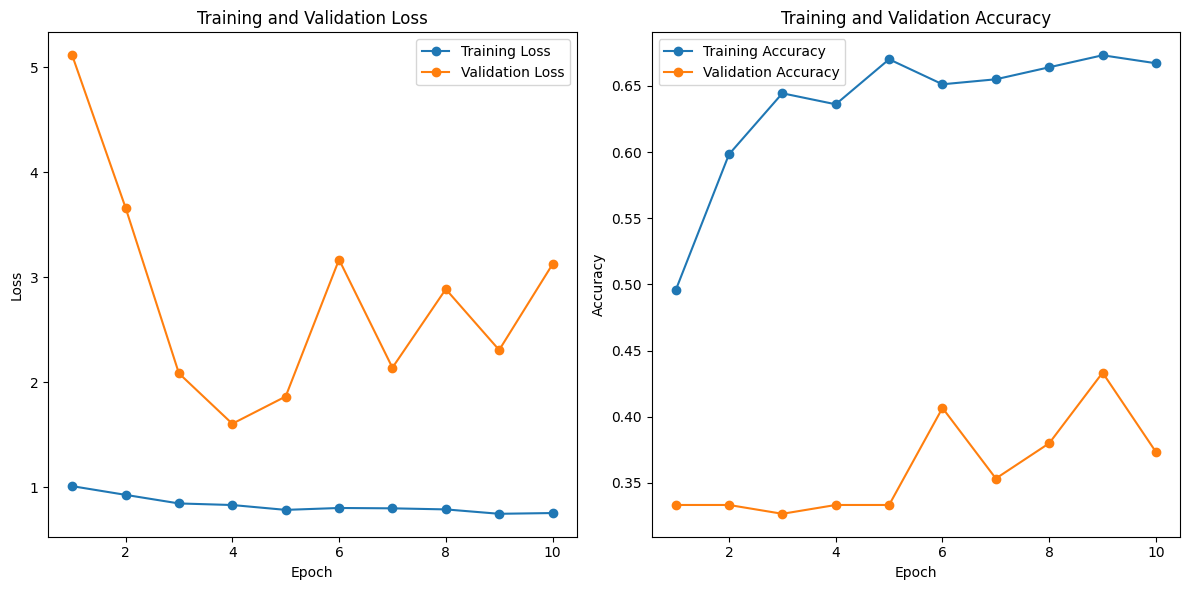

In [ ]:
import matplotlib.pyplot as plt

# Extract training and validation loss and accuracy from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot loss per epoch
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), training_loss, label='Training Loss', marker='o')
plt.plot(range(1, epochs + 1), validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy per epoch
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), training_accuracy, label='Training Accuracy', marker='o')
plt.plot(range(1, epochs + 1), validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


its also perform badly so here we know that our porblem is not solving by simple neural Architecture now we are going to take some higher and Advanced steps let come.............

<a id=7></a>
# **7. Simple Covalutional Neural Network:**

In [ ]:
import keras

input_shape = (256, 256, 3)
n_classes = 3
model = keras.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32,activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
epochs = 50  # Adjust as needed
steps_per_epoch = len(train_data)
validation_steps = len(test_data)
history=model.fit(
    train_data,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_data,
    validation_steps=validation_steps,
    epochs=epochs
)


Epoch 1/50
42/42 [==============================] - 1280s 30s/step - loss: 1.0636 - accuracy: 0.4236 - val_loss: 0.9027 - val_accuracy: 0.5733
Epoch 2/50
42/42 [==============================] - 104s 2s/step - loss: 0.8310 - accuracy: 0.5756 - val_loss: 0.7917 - val_accuracy: 0.5667
Epoch 3/50
42/42 [==============================] - 105s 2s/step - loss: 0.7209 - accuracy: 0.6271 - val_loss: 0.7721 - val_accuracy: 0.5533
Epoch 4/50
42/42 [==============================] - 109s 3s/step - loss: 0.6756 - accuracy: 0.6407 - val_loss: 0.9972 - val_accuracy: 0.5733
Epoch 5/50
42/42 [==============================] - 117s 3s/step - loss: 0.7291 - accuracy: 0.6271 - val_loss: 1.0811 - val_accuracy: 0.4667
Epoch 6/50
42/42 [==============================] - 105s 3s/step - loss: 0.7160 - accuracy: 0.6407 - val_loss: 0.7896 - val_accuracy: 0.6000
Epoch 7/50
42/42 [==============================] - 107s 3s/step - loss: 0.6830 - accuracy: 0.6626 - val_loss: 0.7761 - val_accuracy: 0.6067
Epoch 8/50


In [ ]:
model.save('/content/drive/My Drive/Deep Learning/plant_disease_detection/version11.1.keras')
model.save('/content/drive/My Drive/Deep Learning/plant_disease_detection/version11_.1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<a id=8></a>
# **8.Simple convolutionnl  Neural Testing and Evaluating:**

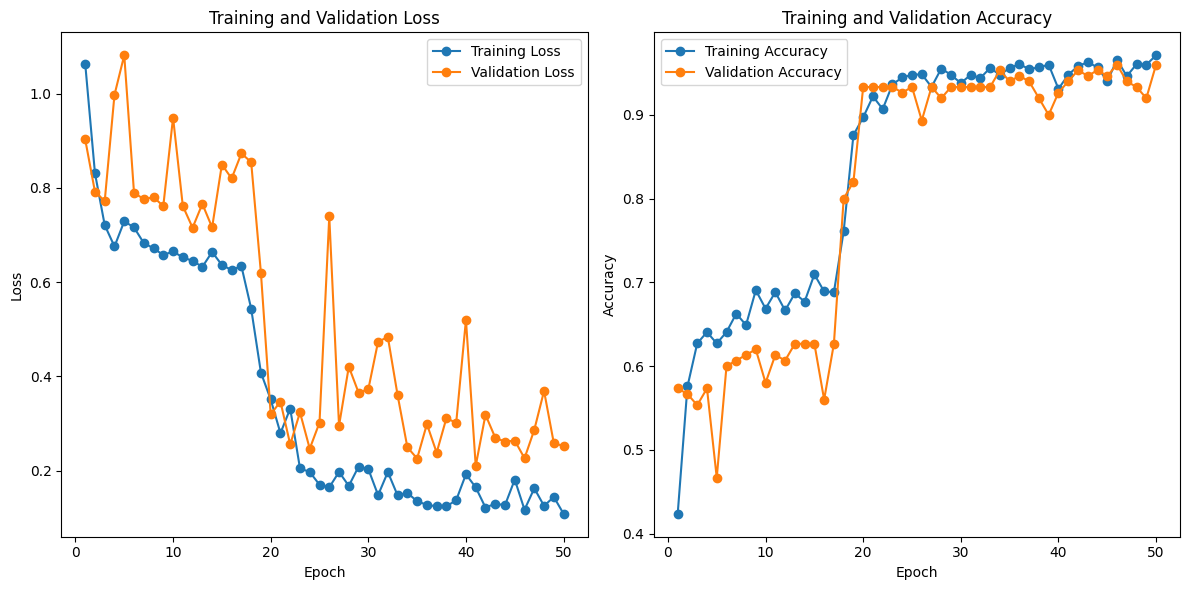

In [ ]:
import matplotlib.pyplot as plt

# Extract training and validation loss and accuracy from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot loss per epoch
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), training_loss, label='Training Loss', marker='o')
plt.plot(range(1, epochs + 1), validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy per epoch
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), training_accuracy, label='Training Accuracy', marker='o')
plt.plot(range(1, epochs + 1), validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.evaluate(valid_data)

60/60 [==============================] - 57s 946ms/step - loss: 0.1648 - accuracy: 0.9667


[0.1648140847682953, 0.9666666388511658]

In [ ]:
train_data.class_indices

{'Healthy': 0, 'Powdery': 1, 'Rust': 2}

In [ ]:
import tensorflow as tf
import numpy as np

# Your single_predict function
def single_predict(path):
    classes = ["HEALTHY", "POWDERY", "RUST"]

    # Load and preprocess the image
    image = tf.keras.utils.load_img(
        path,
        grayscale=False,
        color_mode='rgb',
        target_size=(256, 256),
        interpolation='nearest',
        keep_aspect_ratio=False
    )

    input_arr = tf.keras.utils.img_to_array(image)
    input_arr = input_arr / 255.0
    input_arr = np.array([input_arr])

    # Predict using the model
    predictions = model.predict(input_arr)

    index = np.argmax(predictions)
    confidence = np.max(predictions)

    return classes[index], confidence

In [ ]:


# Define the path to the image
path = "/content/drive/My Drive/webimage/healthy2.png"

# Make a prediction using the single_predict function
result_class, result_confidence = single_predict(path)

print("Predicted Class:", result_class)
print("Confidence:", result_confidence)


1/1 [==============================] - 9s 9s/step
Predicted Class: HEALTHY
Confidence: 1.0


1/1 [==============================] - 0s 51ms/step


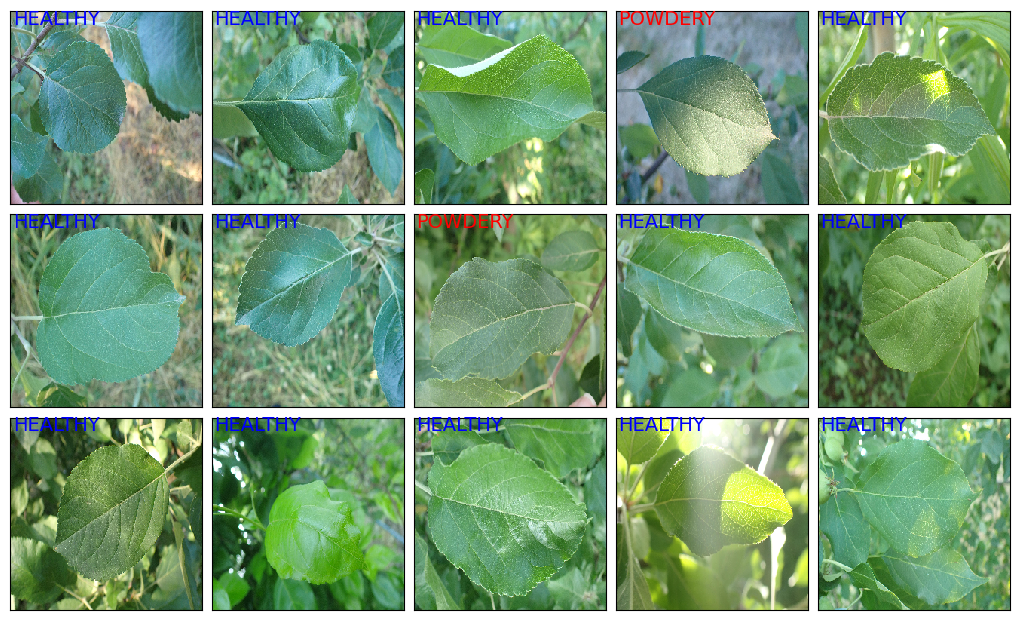

In [ ]:
# Customize class names and labels according to your problem
class_names = ['HEALTHY', 'POWDERY',"RUST"]

# Assuming you have loaded your data and predictions as follows
# Replace these with your actual data and predictions
x_valid, label_batch = next(iter(valid_data))
prediction_values = model.predict(x_valid)

# Set up the figure
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot the images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_valid[i], cmap=plt.cm.gray_r, interpolation='nearest')

    if np.argmax(prediction_values[i]) == np.argmax(label_batch[i]):
        # Label the image with blue text if the prediction is correct
        ax.text(3, 17, class_names[np.argmax(prediction_values[i])], color='blue', fontsize=14)
    else:
        # Label the image with red text if the prediction is incorrect
        ax.text(3, 17, class_names[np.argmax(prediction_values[i])], color='red', fontsize=14)

plt.show()
